# ***Is your mushroom poisonous?***

In [ ]:
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

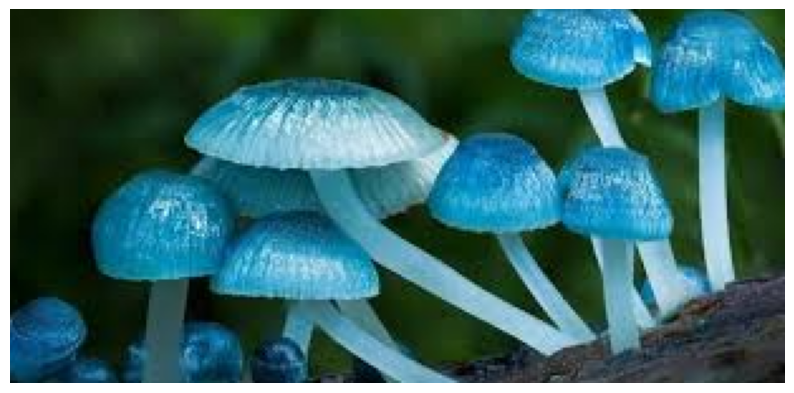

In [ ]:
img =imread('/content/drive/MyDrive/PROJECTS/Project-Mushroom/mushroom pic.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

**There is no simple rule for determining edibility of a mushroom. Yet with the vast possibility of machine learning, one can predict the same and that too with 99% accuracy. My project builds a successful model for predicting whether a mushroom is poisonous or not based on different features. The data corresponds  to 23 species of gilled mushrooms in the Agaricus and Lepiota Family.  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one**

data source: https://archive.ics.uci.edu/dataset/73/mushroom

**1. Loading data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PROJECTS/Project-Mushroom/secondary_data.csv',delimiter=';')
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


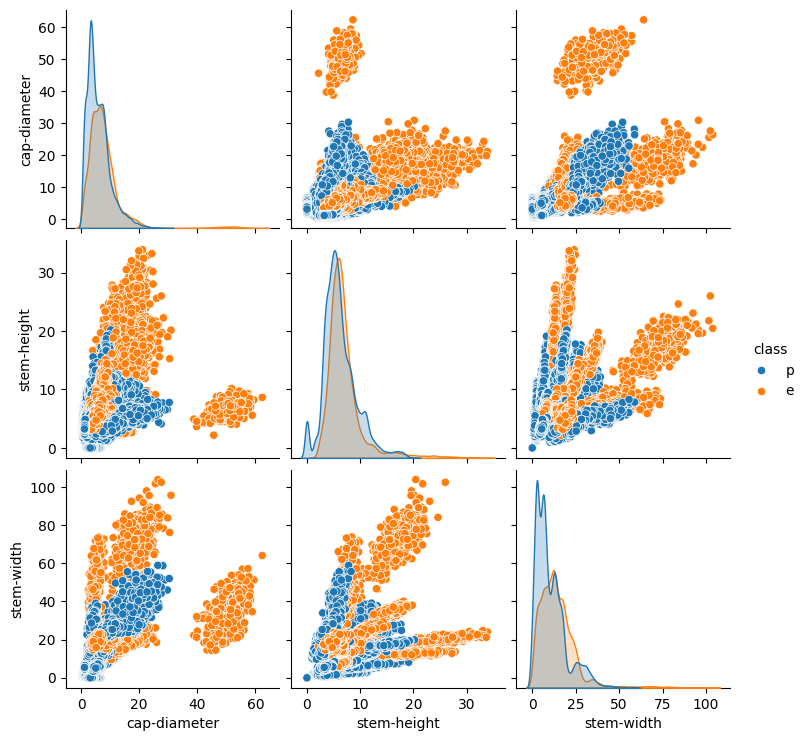

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

**2. Checking missing values**

In [ ]:
df.isna().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0


**3.Handling missing values**

Features with more than half missing values are dropped and rest of the missing values are replaced with mode of those columns.

In [ ]:
df.drop(['stem-root','stem-surface','veil-type','veil-color','spore-print-color'],axis=1,inplace=True)

In [ ]:
labels=['cap-surface','gill-attachment','gill-spacing','ring-type']
for label in labels:
  df[label]=df[label].fillna(df[label].mode()[0])

In [ ]:
df.isna().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0
stem-height,0


**4.Converting to numeric data types**

In [ ]:
df.dtypes

,0
class,object
cap-diameter,float64
cap-shape,object
cap-surface,object
cap-color,object
does-bruise-or-bleed,object
gill-attachment,object
gill-spacing,object
gill-color,object
stem-height,float64


In [ ]:
encoder=LabelEncoder()
features=['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
        'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']
for feature in features:
  df[feature]=encoder.fit_transform(df[feature])

In [ ]:
df.dtypes

,0
class,int64
cap-diameter,float64
cap-shape,int64
cap-surface,int64
cap-color,int64
does-bruise-or-bleed,int64
gill-attachment,int64
gill-spacing,int64
gill-color,int64
stem-height,float64


**5. Evaluating correlation between features and target**

Features with correlation less than 0.06 are dropped.

In [ ]:
df.corr()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
class,1.000000,-0.181139,-0.106309,-0.026163,0.026411,-0.019889,-0.095433,-0.049022,-0.060701,-0.121593,-0.197368,-0.094772,0.057559,0.092330,-0.041923,-0.054046
cap-diameter,-0.181139,1.000000,0.103923,0.067225,0.042108,0.179440,0.171773,-0.121393,0.221675,0.422560,0.695330,0.008670,0.077024,0.036040,-0.125820,0.037305
cap-shape,-0.106309,0.103923,1.000000,-0.067617,0.016312,0.191804,0.046843,-0.038022,0.115703,0.034473,0.157440,0.009061,0.036017,0.146909,-0.124754,-0.027178
cap-surface,-0.026163,0.067225,-0.067617,1.000000,0.113660,-0.095095,0.028598,0.050403,-0.025676,0.072723,0.060477,0.118172,0.097993,-0.050511,0.068960,0.011643
cap-color,0.026411,0.042108,0.016312,0.113660,1.000000,0.010657,0.007889,-0.008889,0.136560,-0.010732,0.000573,0.265525,0.070843,-0.011589,0.031706,0.008443
does-bruise-or-bleed,-0.019889,0.179440,0.191804,-0.095095,0.010657,1.000000,0.046402,-0.147406,0.018613,0.076596,0.183514,-0.024913,0.019195,0.000692,-0.102747,-0.051146
gill-attachment,-0.095433,0.171773,0.046843,0.028598,0.007889,0.046402,1.000000,0.066664,0.097762,0.071990,0.229633,0.002933,-0.143827,-0.112069,-0.060099,-0.034507
gill-spacing,-0.049022,-0.121393,-0.038022,0.050403,-0.008889,-0.147406,0.066664,1.000000,-0.315955,-0.220753,0.045916,-0.076356,-0.108506,-0.121583,-0.010124,0.050540
gill-color,-0.060701,0.221675,0.115703,-0.025676,0.136560,0.018613,0.097762,-0.315955,1.000000,0.157327,0.113915,0.149863,-0.055640,-0.009038,-0.075768,-0.011360
stem-height,-0.121593,0.422560,0.034473,0.072723,-0.010732,0.076596,0.071990,-0.220753,0.157327,1.000000,0.436117,0.138458,0.281049,0.191896,-0.020664,-0.020630


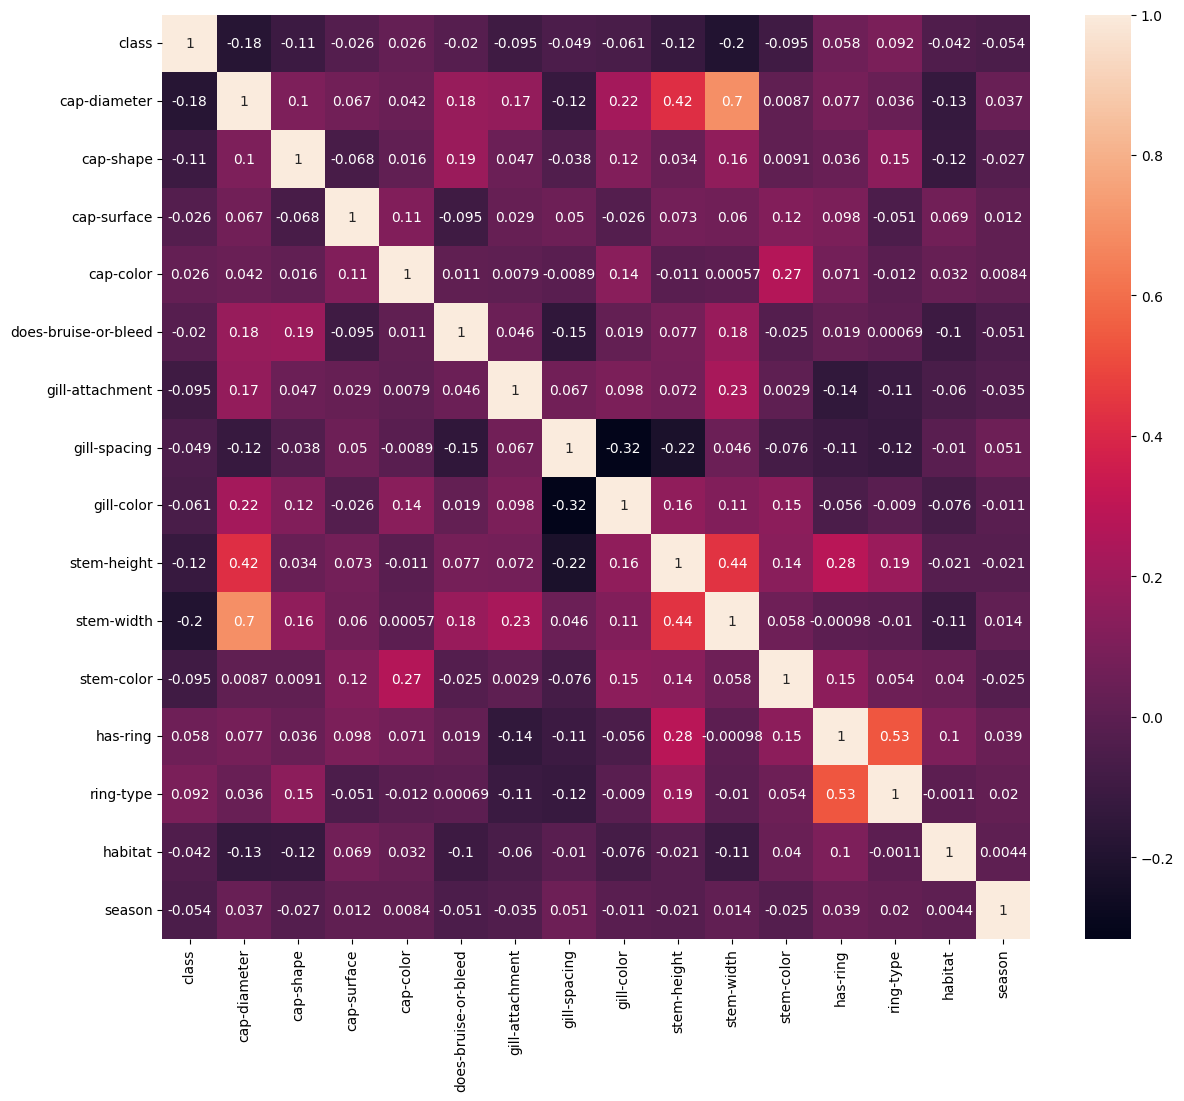

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
corr=df.corr()
target='class'
target_corr=corr[target]
low_correlation_features = target_corr[abs(target_corr) < 0.06]
print(low_correlation_features)

cap-surface            -0.026163
cap-color               0.026411
does-bruise-or-bleed   -0.019889
gill-spacing           -0.049022
has-ring                0.057559
habitat                -0.041923
season                 -0.054046
Name: class, dtype: float64


In [ ]:
df.drop(['cap-surface','cap-color','does-bruise-or-bleed','gill-spacing','has-ring','habitat','season'],axis=1,inplace=True)
df

,class,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,ring-type
0,1,15.26,6,2,10,16.95,17.09,11,2
1,1,16.60,6,2,10,17.99,18.19,11,2
2,1,14.07,6,2,10,17.80,17.74,11,2
3,1,14.17,2,2,10,15.77,15.98,11,5
4,1,14.64,6,2,10,16.53,17.20,11,5
...,...,...,...,...,...,...,...,...,...
61064,1,1.18,5,3,2,3.93,6.22,12,1
61065,1,1.27,2,3,2,3.18,5.43,12,1
61066,1,1.27,5,3,2,3.86,6.37,12,1
61067,1,1.24,2,3,2,3.56,5.44,12,1


In [ ]:
labels=['cap-diameter',	'cap-shape',	'gill-attachment'	,'gill-color'	,'stem-height',	'stem-width',	'stem-color'	,'ring-type']
for label in labels:
  print(label)
  print(df[label].unique())

cap-diameter
[15.26 16.6  14.07 ... 22.85 21.8  20.42]
cap-shape
[6 2 4 0 1 5 3]
gill-attachment
[2 0 1 5 6 4 3]
gill-color
[10  5  7  9  0  3 11  8  1  6  4  2]
stem-height
[16.95 17.99 17.8  ...  1.23  1.16  0.  ]
stem-width
[17.09 18.19 17.74 ... 32.59 30.99 30.51]
stem-color
[11 12  6 10  0  5  9  8  1  4  3  7  2]
ring-type
[2 5 0 3 1 4 6 7]


**6.Handling imbalance in dataset**

In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
df['class'].value_counts()

,count
class,
1,33888
0,27181


In [ ]:
us=RandomUnderSampler(random_state=1)
X,y=us.fit_resample(X,y)
y.value_counts()

,count
class,
0,27181
1,27181


**7.Scaling features to a common range**

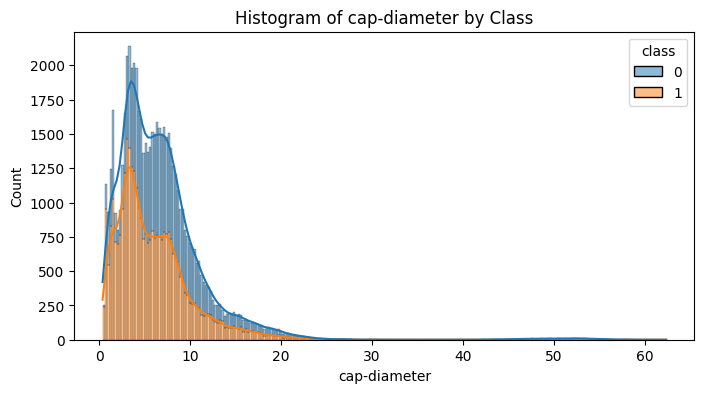

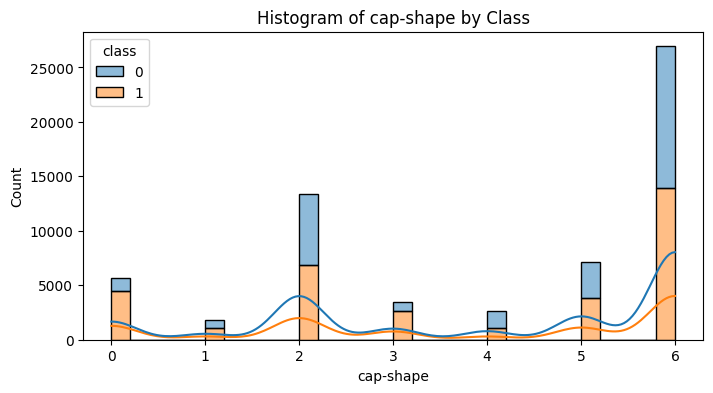

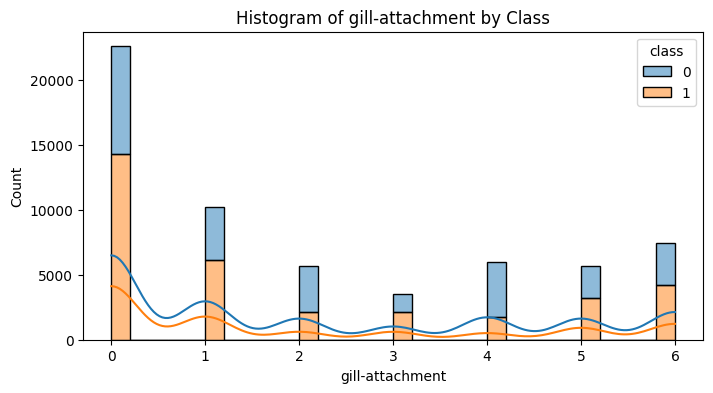

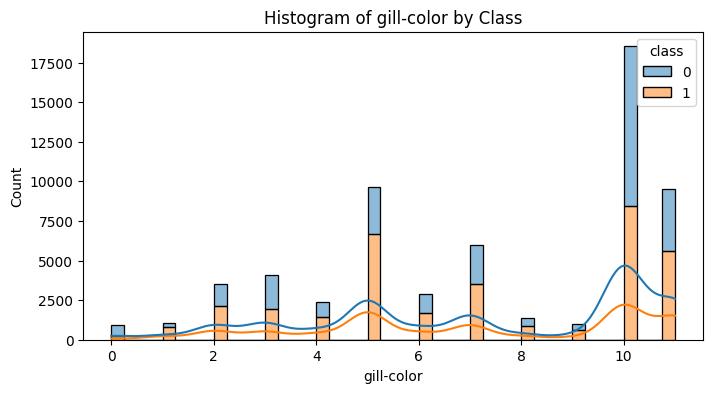

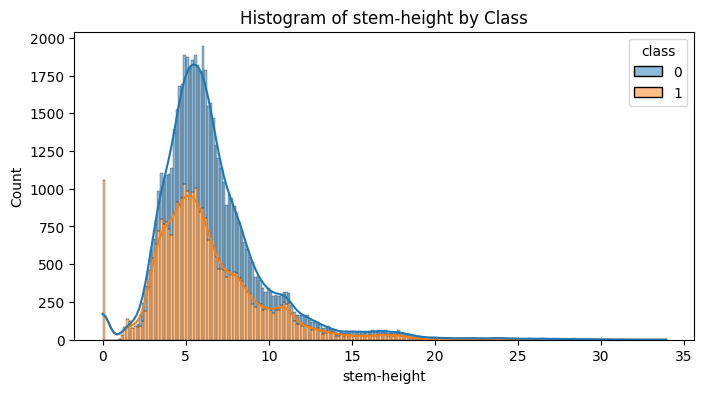

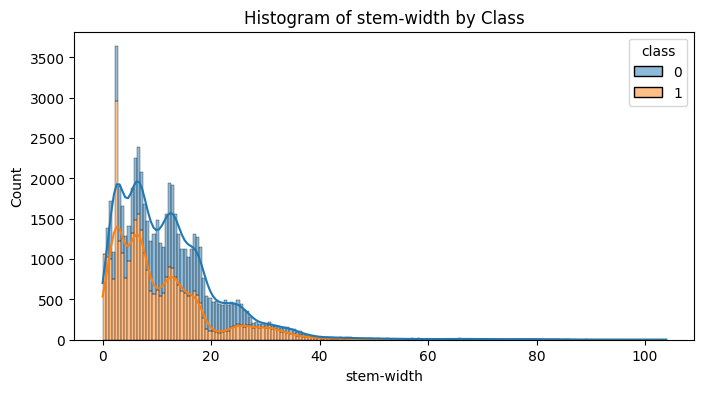

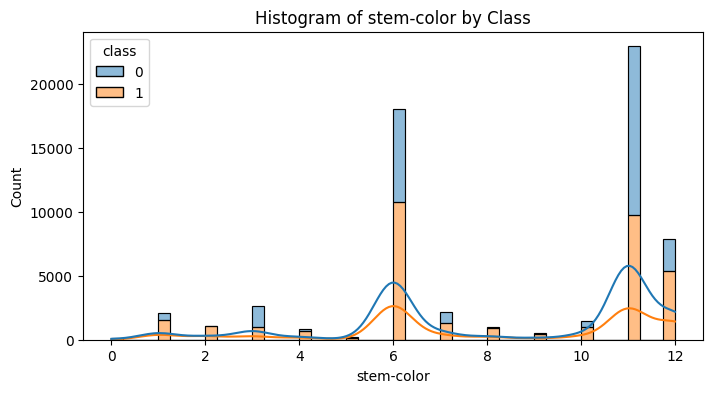

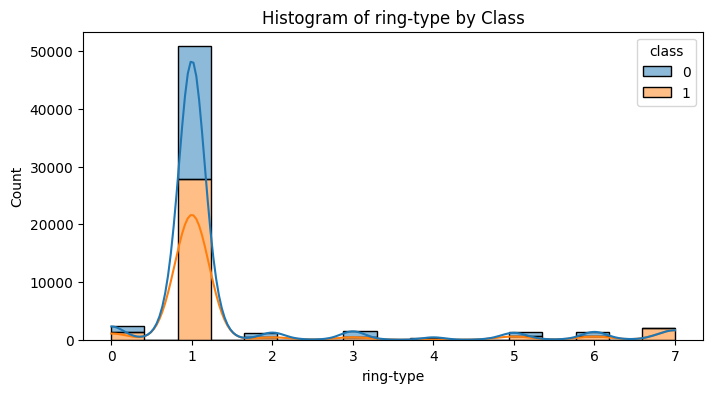

In [ ]:
for column in df.columns:
    if column != 'class':
        plt.figure(figsize=(8, 4))
        sns.histplot(df, x=column, hue='class', multiple="stack", kde=True)
        plt.title(f'Histogram of {column} by Class')
        plt.show()

The dataset is mostly normally distributed. So standard scaler is the best option.

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

**8. Splitting data for training and testing.**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((38053, 8), (38053,), (16309, 8), (16309,))

**9. Building models**

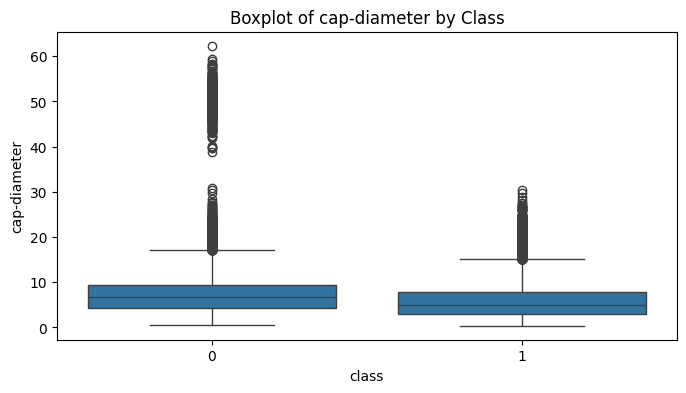

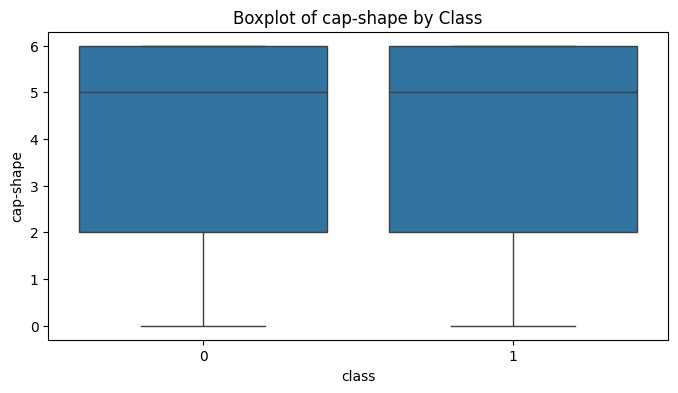

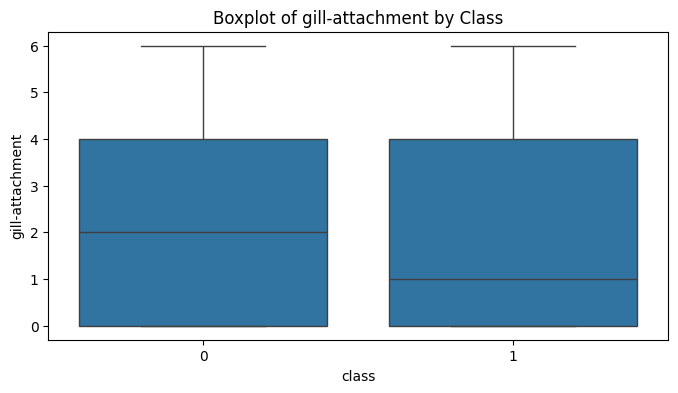

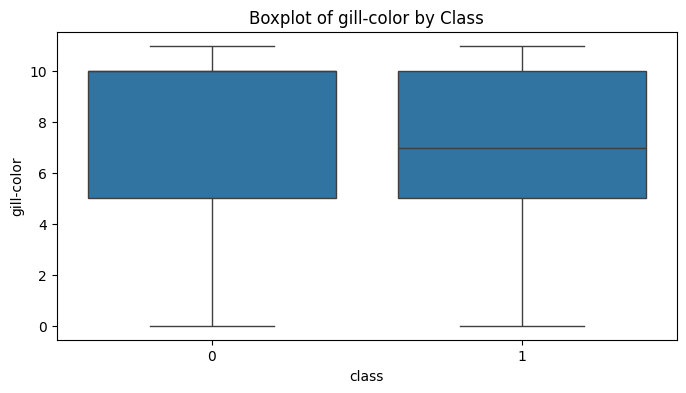

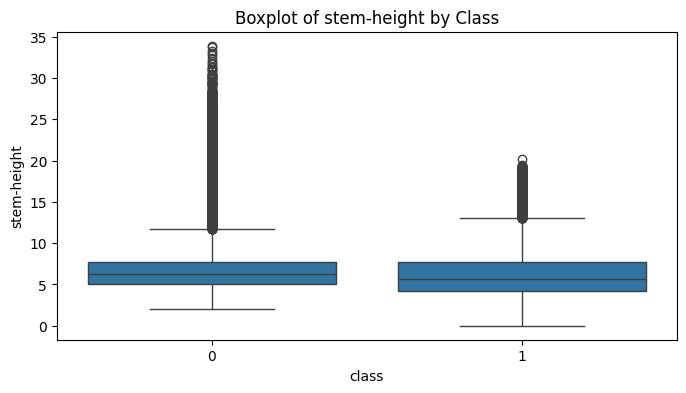

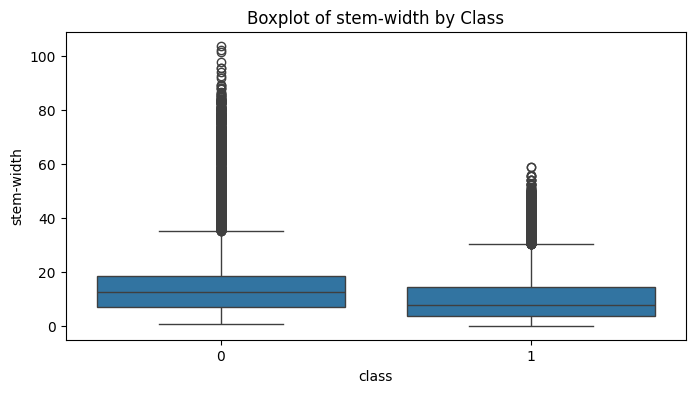

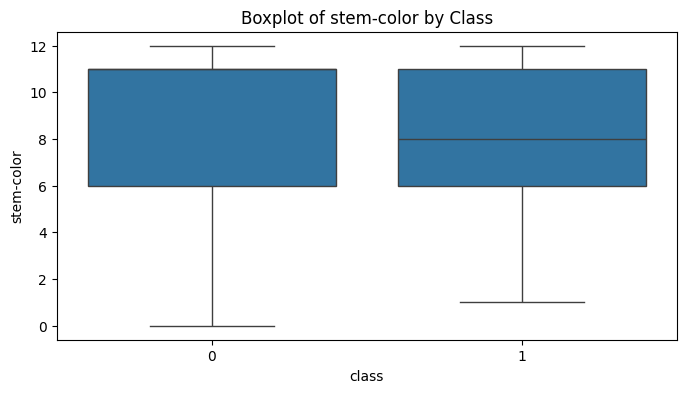

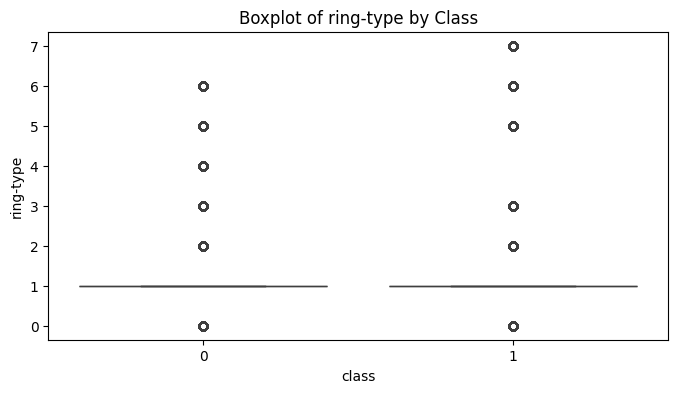

In [ ]:
for column in df.columns:
    if column != 'class':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='class', y=column, data=df)
        plt.title(f'Boxplot of {column} by Class')
        plt.show()

There are severe cases of outliers. The models SVC,KNN and Naive Bayes are highly sensitive to outliers hence exempted. Using tree based algorithms are the best option.

In [ ]:
dec=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xg=XGBClassifier()

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8200
           1       0.98      0.98      0.98      8109

    accuracy                           0.98     16309
   macro avg       0.98      0.98      0.98     16309
weighted avg       0.98      0.98      0.98     16309

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8200
           1       0.99      0.99      0.99      8109

    accuracy                           0.99     16309
   macro avg       0.99      0.99      0.99     16309
weighted avg       0.99      0.99      0.99     16309

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      8200
           1       0.75      0.72      0.74      8109

    accuracy                           0.74     16309
   macro avg       0.74      0.74      0.74     16309
wei

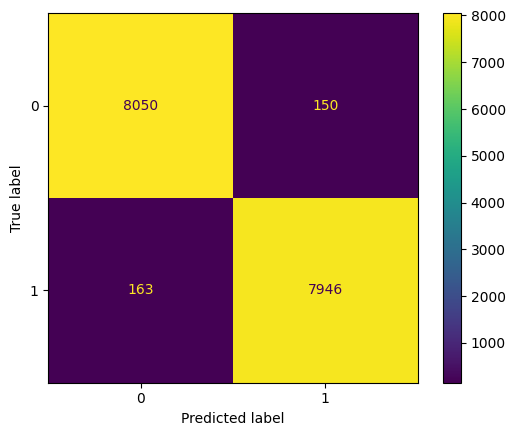

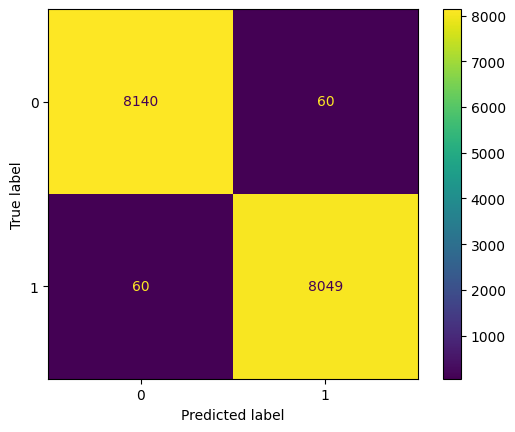

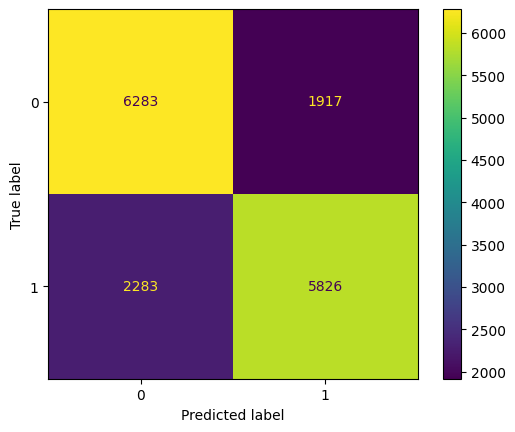

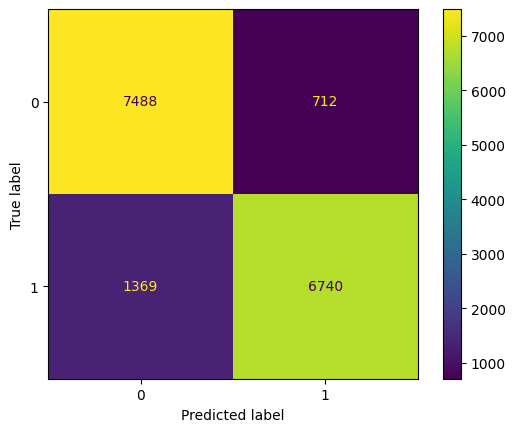

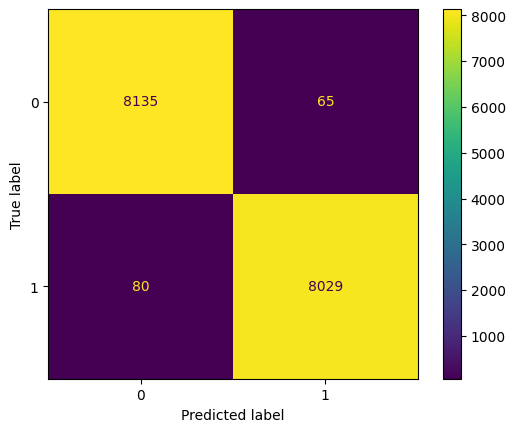

In [ ]:
models=[dec,rf,ab,gb,xg]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**10. Choosing the best model.**

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/PROJECTS/Project-Mushroom/RandomForest_XGBoost_Comparison.csv')
df1

,Criteria,Random Forest,XGBoost
0,Performance,Strong accuracy (99%),Strong accuracy (99%)
1,Training Speed,"Faster, efficient for large datasets","Slower, more computationally expensive"
2,Overfitting,"Some risk, mitigated by averaging",Built-in regularization to reduce overfitting
3,Interpretability,"Easier to interpret, feature importance available","Less interpretable, but SHAP values can be used"
4,Data Complexity,Good for simpler datasets,"Handles complex, high-dimensional datasets better"
5,Tuning Difficulty,"Easier, fewer parameters to tune","More parameters, requires more tuning for best..."
6,Imbalanced Data,"Requires manual adjustments (e.g., class weights)","Better options for handling imbalance (e.g., s..."


Random forest is the best model here.

In [ ]:
import pickle
pickle.dump(rf,open('model_.sav','wb'))
pickle.dump(scaler,open('scaler_.sav','wb'))